For each year we need the following information:
* Total revenue for the current year
* New Customer Revenue e.g. new customers not present in previous year only
* Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year
* Revenue lost from attrition
* Existing Customer Revenue Current Year
* Existing Customer Revenue Prior Year
* Total Customers Current Year
* Total Customers Previous Year
* New Customers
* Lost Customers

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('casestudy.csv')
data.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685927 entries, 0 to 685926
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      685927 non-null  int64  
 1   customer_email  685927 non-null  object 
 2   net_revenue     685927 non-null  float64
 3   year            685927 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 20.9+ MB


In [4]:
data['year'].value_counts()

2017    249987
2015    231294
2016    204646
Name: year, dtype: int64

## Total Revenue for the current year

In [5]:
total_revenue = pd.pivot_table(data = data,
                               values = 'net_revenue',
                             index = 'year',
                              aggfunc = 'sum').reset_index()
total_revenue

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


In [6]:
#data.groupby('year').sum()

## New Customer Revenue e.g. new customers not present in previous year only

In [7]:
# in 2015, not sure if these customers have made revenue before, I suppose all customers are new customers
year1 = data.loc[data['year'] == 2015]
year2 = data.loc[(data['year'] == 2016)]
year3 = data.loc[(data['year'] == 2017)]
year2_new = year2.loc[(data['customer_email'].isin(year1['customer_email']) == False)]
year3_new = year3.loc[(data['customer_email'].isin(year2['customer_email']) == False)]
total = pd.concat([year1,year2_new,year3_new])

In [8]:
total_new_revenue = pd.DataFrame(total['net_revenue'].groupby(total['year']).sum())
total_new_revenue = total_new_revenue.reset_index()
total_new_revenue

,year,net_revenue
0,2015,29036749.19
1,2016,18245491.01
2,2017,28776235.04


## Existing Customer Growth

In [9]:
existing2 = year2.loc[(data['customer_email'].isin(year1['customer_email']) == True)]
existing3 = year3.loc[(data['customer_email'].isin(year2['customer_email']) == True)]
existing_customer_growth = pd.DataFrame({'year':[2015,2016,2017],'existing_growth':[0,existing2['net_revenue'].sum()-0,existing3['net_revenue'].sum()-existing2['net_revenue'].sum()]})
existing_customer_growth

,year,existing_growth
0,2015,0.00
1,2016,7485452.58
2,2017,-4844192.59


## Revenue Lost from Attribution

In [10]:
lost1 = year1.loc[year1['customer_email'].isin(year2['customer_email']) == False]
lost2 = year2.loc[year2['customer_email'].isin(year3['customer_email']) == False]
total_lost = pd.concat([lost1,lost2])

In [11]:
revenue_attrition = pd.DataFrame(total_lost['net_revenue'].groupby(total_lost['year']+1).sum()).reset_index()
revenue_attrition = revenue_attrition.append({'year':2015,'net_revenue':0},ignore_index = True).rename(columns = {'net_revenue':'revenue_lost_from_sttrition'})
revenue_attrition=revenue_attrition.sort_values('year').reset_index(drop=True)
revenue_attrition

,year,revenue_lost_from_sttrition
0,2015,0.00
1,2016,21571632.07
2,2017,23110294.94


## Existing Customer Revenue Current Year

In [12]:
year2_exist = data.loc[(data['year'] == 2016)& (data['customer_email'].isin(year1['customer_email']) == True)]
year3_exist = data.loc[(data['year'] == 2017)& (data['customer_email'].isin(year2['customer_email']) == True)]
total_exist = pd.concat([year2_exist,year3_exist])

In [13]:
revenue_current = pd.DataFrame(total_exist['net_revenue'].groupby(total_exist.year).sum()).reset_index()

In [14]:
revenue_current = revenue_current.append({'year':2015,'net_revenue':0},ignore_index = True).rename(columns = {'net_revenue':'revenue_existing_current'})
revenue_current = revenue_current.sort_values('year').reset_index(drop=True)
revenue_current

,year,revenue_existing_current
0,2015,0.00
1,2016,7485452.58
2,2017,2641259.99


## Existing Customer Revenue Prior Year

In [15]:
previous1 = year1.loc[year1['customer_email'].isin(year2['customer_email']) == True]
previous2 = year2.loc[year2['customer_email'].isin(year3['customer_email']) == True]
total_previous = pd.concat([previous1,previous2])

In [16]:
revenue_previous = pd.DataFrame(total_previous.net_revenue.groupby(total_previous['year']+1).sum()).reset_index()

In [17]:
revenue_previous = revenue_previous.append({'year':2015,'net_revenue':0},ignore_index = True).rename(columns = {'net_revenue':'revenue_existing_previous'})
revenue_previous=revenue_previous.sort_values('year').reset_index(drop=True)
revenue_previous

,year,revenue_existing_previous
0,2015,0.00
1,2016,7465117.12
2,2017,2620648.65


## Total Customers Current Year

In [18]:
total_customers = pd.pivot_table(data = data,
                               values = 'customer_email',
                              index = 'year',
                              aggfunc = 'count').reset_index()
total_customers = total_customers.rename(columns = {'customer_email':'total_customers'})
total_customers

,year,total_customers
0,2015,231294
1,2016,204646
2,2017,249987


## Total Customers Previous Year

In [19]:
previous_year = pd.DataFrame(total_previous.customer_email.groupby(total_previous['year']+1).count()).reset_index()
previous_year = previous_year.append({'year':2015,'customer_email':0},ignore_index = True).rename(columns = {'customer_email':'customers_previous_year'})
previous_year = previous_year.sort_values('year').reset_index(drop=True)
previous_year

,year,customers_previous_year
0,2015,0
1,2016,59584
2,2017,20959


## New Customers

In [20]:
total_newcustomers = pd.pivot_table(data = total,
                               values = 'customer_email',
                              index = 'year',
                              aggfunc = 'count').reset_index()
total_newcustomers = total_newcustomers.rename(columns = {'customer_email':'new_customers'})
total_newcustomers

,year,new_customers
0,2015,231294
1,2016,145062
2,2017,229028


## Lost Customers

In [21]:
summary = total_customers.join(total_newcustomers.set_index('year'), on ='year')
total_lost = pd.DataFrame(total_lost['customer_email'].groupby(total_lost['year']+1).count()).reset_index()

In [22]:
total_lost = total_lost.append({'year':2015,'customer_email':0},ignore_index=True).rename(columns = {'customer_email':'lost_customers'})
total_lost = total_lost.sort_values('year').reset_index(drop=True)
total_lost

,year,lost_customers
0,2015,0
1,2016,171710
2,2017,183687


## Visulization

<Figure size 720x504 with 0 Axes>

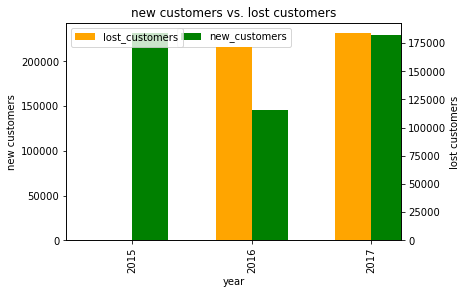

In [23]:
# new customer for each year and lost customers 
plt.figure(figsize = (10,7))
compare = total_newcustomers.join(total_lost.set_index('year'), on = 'year')
compare = compare.set_index('year')
fig = plt.figure()
ax1 = fig.subplots()
ax2 = ax1.twinx()
width = 0.3
compare.new_customers.plot(kind='bar',color='green',ax=ax1,width=width, position=0)
compare.lost_customers.plot(kind='bar',color='orange', ax=ax2,width = width,position=1)
ax1.set_ylabel('new customers')
ax2.set_ylabel('lost customers')
plt.title('new customers vs. lost customers')
ax1.legend(['new_customers'])
ax2.legend(['lost_customers'])
# In year 2016, the number of new customers is very low 

In [24]:
#percentage of new customers each year(#customers new this year/#customers this year) 
#and percentage of new revenue each year(revenue new this year/revenue this year)
total_newcustomers['total_customers'] =  total_customers['total_customers']
total_newcustomers['revenue_new_customers'] = total_new_revenue['net_revenue']
total_newcustomers['total_revenue'] = total_revenue['net_revenue']
total_newcustomers

,year,new_customers,total_customers,revenue_new_customers,total_revenue
0,2015,231294,231294,29036749.19,29036749.19
1,2016,145062,204646,18245491.01,25730943.59
2,2017,229028,249987,28776235.04,31417495.03


In [25]:
total_newcustomers['average_newcustomer_revenue'] = total_newcustomers['revenue_new_customers']/total_newcustomers['new_customers']

In [26]:
total_newcustomers

,year,new_customers,total_customers,revenue_new_customers,total_revenue,average_newcustomer_revenue
0,2015,231294,231294,29036749.19,29036749.19,125.540434
1,2016,145062,204646,18245491.01,25730943.59,125.777192
2,2017,229028,249987,28776235.04,31417495.03,125.645052


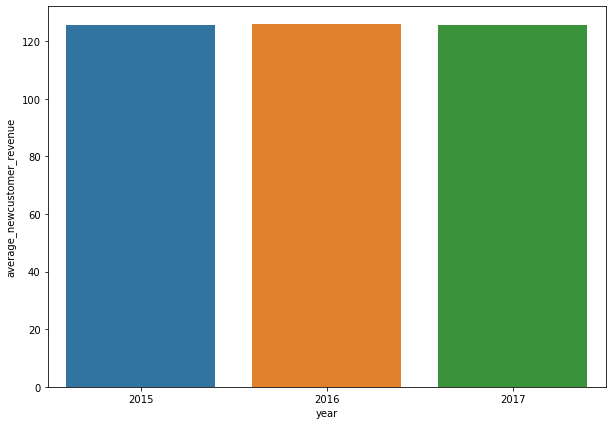

In [27]:
plt.figure(figsize = (10,7))
sns.barplot(x= 'year',y = 'average_newcustomer_revenue',data= total_newcustomers)
# The average revenue generated by new_customers are similar for each year,
#after calculation, in each year, all customers generates similar revenue

In [28]:
# the percentage of existing customers each year and new customers each year
total_newcustomers['existing customers rate'] = (total_newcustomers['total_customers']-total_newcustomers['new_customers'])/total_newcustomers['total_customers']*100
total_newcustomers['new customers rate'] =total_newcustomers['new_customers']/total_newcustomers['total_customers']*100
total_newcustomers

,year,new_customers,total_customers,revenue_new_customers,total_revenue,average_newcustomer_revenue,existing customers rate,new customers rate
0,2015,231294,231294,29036749.19,29036749.19,125.540434,0.000000,100.000000
1,2016,145062,204646,18245491.01,25730943.59,125.777192,29.115644,70.884356
2,2017,229028,249987,28776235.04,31417495.03,125.645052,8.384036,91.615964


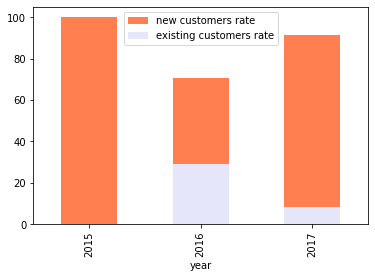

In [29]:
ax = total_newcustomers.plot(x="year", y="new customers rate", kind="bar",stacked=True,color = 'coral')
total_newcustomers.plot(x="year", y="existing customers rate", kind="bar", ax=ax, color="lavender",stacked=True)
plt.show()
# In year 2016, existing customers are most in three years

In [30]:
#retention rate
retention = pd.DataFrame({'year':[2015,2016,2017],
                         'retention_rate':[0,59584/231294*100,20959/204646*100]})
retention

,year,retention_rate
0,2015,0.000000
1,2016,25.761152
2,2017,10.241588


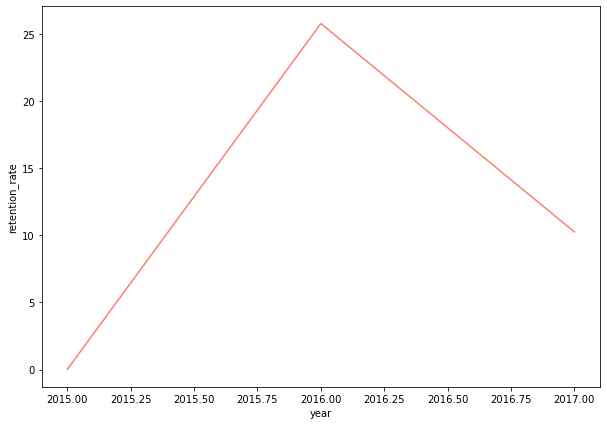

In [31]:
plt.figure(figsize = (10,7))
sns.lineplot(x='year',y = 'retention_rate',data = retention,color = 'salmon')
#the retention rate is highest in 2016

In [32]:
total_revenue['new_customer_revenue'] = total_new_revenue['net_revenue']
total_revenue['existing_cusomer_growth'] = existing_customer_growth['existing_growth']
total_revenue['revenue_lost_from_attrition'] = revenue_attrition['revenue_lost_from_sttrition']
total_revenue['existing_customer_revenue_current_year'] = revenue_current['revenue_existing_current']
total_revenue['existing_customer_revenue_prior_year'] = revenue_previous['revenue_existing_previous']
total_revenue['total_customer_current_year'] = total_customers['total_customers']
total_revenue['total_customer_previous_year'] = previous_year['customers_previous_year']
total_revenue['new_customers'] = total_newcustomers['new_customers']
total_revenue['lost_customers'] = total_lost['lost_customers']
total_revenue 

,year,net_revenue,new_customer_revenue,existing_cusomer_growth,revenue_lost_from_attrition,existing_customer_revenue_current_year,existing_customer_revenue_prior_year,total_customer_current_year,total_customer_previous_year,new_customers,lost_customers
0,2015,29036749.19,29036749.19,0.00,0.00,0.00,0.00,231294,0,231294,0
1,2016,25730943.59,18245491.01,7485452.58,21571632.07,7485452.58,7465117.12,204646,59584,145062,171710
2,2017,31417495.03,28776235.04,-4844192.59,23110294.94,2641259.99,2620648.65,249987,20959,229028,183687


In [36]:
total_revenue.to_html('case#2result.html')

In [35]:
print(html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>year</th>
      <th>net_revenue</th>
      <th>new_customer_revenue</th>
      <th>existing_cusomer_growth</th>
      <th>revenue_lost_from_attrition</th>
      <th>existing_customer_revenue_current_year</th>
      <th>existing_customer_revenue_prior_year</th>
      <th>total_customer_current_year</th>
      <th>total_customer_previous_year</th>
      <th>new_customers</th>
      <th>lost_customers</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>2015</td>
      <td>29036749.19</td>
      <td>29036749.19</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>0.00</td>
      <td>231294</td>
      <td>0</td>
      <td>231294</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>2016</td>
      <td>25730943.59</td>
      <td>18245491.01</td>
      <td>7485452.58</td>
      <td>21571632.07</td>
      <td>7485452.58</td>
      